In [1]:
# Steps done below

# importing the required packages first
# reading the csv file and creating the dataframe
# checking the null values
# checking the number of unique values of all columns
# convering the datatypes
# removing the "00000" datas in the "material_ref" column
# checking the missing values percentage and droping the maximum missing values column
# finding the negative values and replacing those data with 0
# filling the null values using mode and median method
# encoding the categorical column
# checking the skewed columns using distplot, histplot and outlier using boxplot
# creating the new column to handle skeweness in the data using log
# handling the outlier using IQR method
# cross check the outlier using plot(boxplot)
# drop the unwanted old skewed columns
# check the correlation using heatmap
# some delivery date given in the dataset is wrong, because the date difference between the item date and delivery date is coming negative value for some datas which is not possible
# date difference column is not given in the dataset, but while doing pre-processing we have created a new column named date difference by subtracting the item date from delivery date in days
# so we are going to predict the delivery date using ml model
# created a new 3 columns for item day, item month, item year, so that it will be usefull to predict the delivery date
# creating a 2 new dataframe for positive date difference value to store and negative date difference value to store
# importing the required model to do delivery date prediction
# creating a function to find the best model to do delivery date prediction
# passing the positive value dataframe and algorithm as parameter for the function and finding the best model
# after finding the best model, creating a new function to pass the postive dataframe to train the model and negative dataframe to test the model, which will give the accurate date difference
# changing the datatype from float to int for the predicted value and updating the date difference value from the negative dataframe using predicted value
# concatenate the postive date difference dataframe and negative date difference dataframe
# create 3 new columns for delivery date day, delivery date month, delivery date year
# our dataframe is now don't have null values and categorical columns
# covert our dataframe to csv file
# uisng the csv file which we created, using our dataframe, we are creating a dataframe
# filter the dataframe by status column having value 1 or 0
# creating a function to predict the won or loss status for classification method
# target variable is imbalanced so we need to balance the data
# after balancing the data, pass the feature variable and target variable and algorithm for the function to predict the best score
# after finding the best algorithm, hyper-tune the model to correct the overfitting
# after hper-tuning using that model, fit the model
# dump the model using pickle
# creating a function to predict the selling price for regression method
# pass the dataframe and algorithm to find the best model
# after finding the best algorithm, hyper-tune the model to correct the overfitting
# after hper-tuning using that model, fit the model
# dump the model using pickle

In [2]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime, timedelta
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
import matplotlib.pyplot as plt
import plotly as px
import seaborn as sns

In [3]:
# reading the data from csv file and creating a dataframe
dataset= pd.read_csv("C:/Users/Godveen/Guvi/capstoneProjects/Copper_Set.csv")
df = pd.DataFrame(dataset)
df

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,DE633116-D1DF-4846-982E-55EFC3658A76,20200702.0,102.4824216,30200854.0,25.0,Won,W,41.0,0.96,1220.0,0000000000000000000000000000000001000777,164141591,20200701.0,591.00
181669,A48374B1-E6DB-45F2-889A-1F9C27C099EB,20200702.0,208.0864686,30200854.0,25.0,Won,W,41.0,0.95,1500.0,0000000000000000000000000000000001000227,164141591,20200701.0,589.00
181670,91643238-5C7B-4237-9A5F-63AE3D35F320,20200702.0,4.235593568,30200854.0,25.0,Won,W,41.0,0.71,1250.0,0000000000000000000000000000000001004216,164141591,20200701.0,619.00
181671,7AFFD323-01D9-4E15-B80D-7D1B03498FC8,20200702.0,-2000,30200854.0,25.0,Won,W,41.0,0.85,1250.0,0000000000000000000000000000000001001149,164141591,20200701.0,601.00


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181672 non-null  float64
 2   quantity tons  181673 non-null  object 
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181672 non-null  float64
 13  selling_price  181672 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 19.4+ MB


In [5]:
#checking the null values in this dataframe
df.isnull().sum()

id                   2
item_date            1
quantity tons        0
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery date        1
selling_price        1
dtype: int64

In [6]:
#checking the unique values of the all columns
for i in df.columns:
    print(i,":",df[i].nunique())

id : 181671
item_date : 252
quantity tons : 181673
customer : 1169
country : 17
status : 9
item type : 7
application : 30
thickness : 594
width : 1386
material_ref : 16563
product_ref : 33
delivery date : 28
selling_price : 9795


In [7]:
#converting the datatypes
# item_date, delivery date, quantity tons
# errors="coerce" is used to convert that any data which is not able to convert,that data will be converted as NaN
df["quantity tons"]= pd.to_numeric(df["quantity tons"],errors="coerce")
df["item_date_1"]= pd.to_datetime(df["item_date"],format="%Y%m%d",errors="coerce").dt.date
df["delivery_date_1"]= pd.to_datetime(df["delivery date"],format="%Y%m%d",errors="coerce").dt.date
df.dtypes

id                  object
item_date          float64
quantity tons      float64
customer           float64
country            float64
status              object
item type           object
application        float64
thickness          float64
width              float64
material_ref        object
product_ref          int64
delivery date      float64
selling_price      float64
item_date_1         object
delivery_date_1     object
dtype: object

In [8]:
#removing the "00000" datas in the "material_ref" column
df["material_ref"]=df["material_ref"].apply(lambda x: np.nan if str(x).startswith("00000") else x)

In [9]:
df

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price,item_date_1,delivery_date_1
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00,2021-04-01,2021-07-01
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,NaN,1668701718,20210401.0,1047.00,2021-04-01,2021-04-01
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33,2021-04-01,2021-01-01
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00,2021-04-01,2021-01-01
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00,2021-04-01,2021-03-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,DE633116-D1DF-4846-982E-55EFC3658A76,20200702.0,102.482422,30200854.0,25.0,Won,W,41.0,0.96,1220.0,NaN,164141591,20200701.0,591.00,2020-07-02,2020-07-01
181669,A48374B1-E6DB-45F2-889A-1F9C27C099EB,20200702.0,208.086469,30200854.0,25.0,Won,W,41.0,0.95,1500.0,NaN,164141591,20200701.0,589.00,2020-07-02,2020-07-01
181670,91643238-5C7B-4237-9A5F-63AE3D35F320,20200702.0,4.235594,30200854.0,25.0,Won,W,41.0,0.71,1250.0,NaN,164141591,20200701.0,619.00,2020-07-02,2020-07-01
181671,7AFFD323-01D9-4E15-B80D-7D1B03498FC8,20200702.0,-2000.000000,30200854.0,25.0,Won,W,41.0,0.85,1250.0,NaN,164141591,20200701.0,601.00,2020-07-02,2020-07-01


In [10]:
# checking Null values
df.isnull().sum()

id                      2
item_date               1
quantity tons           1
customer                1
country                28
status                  2
item type               0
application            24
thickness               1
width                   0
material_ref       100645
product_ref             0
delivery date           1
selling_price           1
item_date_1             3
delivery_date_1         3
dtype: int64

In [11]:
# Checking the missing values percentage
missing_percentage = df.isna().mean()*100
missing_percentage

id                  0.001101
item_date           0.000550
quantity tons       0.000550
customer            0.000550
country             0.015412
status              0.001101
item type           0.000000
application         0.013211
thickness           0.000550
width               0.000000
material_ref       55.398986
product_ref         0.000000
delivery date       0.000550
selling_price       0.000550
item_date_1         0.001651
delivery_date_1     0.001651
dtype: float64

In [12]:
# "material_ref" have a maximum null values (55%) so, we want to drop the column
# And id is a unique values so we want to drop the column

df.drop(columns=["id","material_ref"],inplace=True)

In [13]:
# to find column having negative values
negative_value_columns = [col for col in df.select_dtypes(include=['number']).columns if (df[col] < 0).any()]
negative_value_columns

['quantity tons', 'selling_price']

In [14]:
for i in negative_value_columns:
    df[i]= df[i].apply(lambda x: np.nan if x<=0 else x)

In [15]:
# Checking the null values
df.isnull().sum()

item_date           1
quantity tons       5
customer            1
country            28
status              2
item type           0
application        24
thickness           1
width               0
product_ref         0
delivery date       1
selling_price       8
item_date_1         3
delivery_date_1     3
dtype: int64

In [16]:
# Handling the null values using mean(),median() and mode()

# object columns and mode() method
# mode means most repeating value
df["item_date_1"].fillna(df["item_date_1"].mode().iloc[0],inplace=True)
df["delivery_date_1"].fillna(df["delivery_date_1"].mode().iloc[0],inplace=True)
df["status"].fillna(df["status"].mode().iloc[0],inplace=True)
df["item_date"]. fillna(df["item_date"].mode().iloc[0],inplace=True)
df["delivery date"]. fillna(df["delivery date"].mode().iloc[0],inplace=True)

#numarical column and median() method
# median means middle value after sorting the value
df["quantity tons"].fillna(df["quantity tons"].median(),inplace=True)
df["customer"].fillna(df["customer"].median(),inplace=True)
df["country"].fillna(df["country"].median(),inplace=True)
df["application"].fillna(df["application"].median(),inplace=True)
df["thickness"].fillna(df["thickness"].median(),inplace=True)
df["selling_price"].fillna(df["selling_price"].median(),inplace=True)

In [17]:
# checking the null values
df.isnull().sum()

item_date          0
quantity tons      0
customer           0
country            0
status             0
item type          0
application        0
thickness          0
width              0
product_ref        0
delivery date      0
selling_price      0
item_date_1        0
delivery_date_1    0
dtype: int64

In [18]:
df.head()

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price,item_date_1,delivery_date_1
0,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,1670798778,20210701.0,854.00,2021-04-01,2021-07-01
1,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,1668701718,20210401.0,1047.00,2021-04-01,2021-04-01
2,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,628377,20210101.0,644.33,2021-04-01,2021-01-01
3,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,1668701718,20210101.0,768.00,2021-04-01,2021-01-01
4,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,640665,20210301.0,577.00,2021-04-01,2021-03-01


In [19]:
# Encoding the catagorical columns
df["status"]= df["status"].map({'Won':1, 'Draft':2, 'To be approved':3, 'Lost':0, 'Not lost for AM':4,
                                'Wonderful':5, 'Revised':6, 'Offered':7, 'Offerable':8})
df["item type"]= OrdinalEncoder().fit_transform(df[["item type"]])

In [20]:
df["item type"].unique()

array([5., 6., 3., 1., 2., 0., 4.])

In [21]:
df["status"].value_counts()

1    116012
0     34438
4     19573
6      4276
3      4170
2      3140
7        53
8        10
5         1
Name: status, dtype: int64

In [22]:
# we should handle skewness of the data to predict model better, else model prediction will not be better
# Handling the skewness using (Log Transfermation)

# detecting the skewed columns using plot
def plot(df,column):
    #distplot
    plt.figure(figsize=(15,4))
    plt.subplot(1,3,1)
    sns.distplot(df[column], kde=True, color='skyblue')
    plt.title("distplot for"+" "+column)

    #histogram plot

    plt.subplot(1,3,2)
    sns.histplot(df, x= column, kde= True, bins=30,color="salmon")
    plt.title("histogram plot for"+" "+column)

    #boxplot

    plt.subplot(1,3,3)
    sns.boxplot(x=df[column])
    plt.title("Box plot for"+" "+column)

In [23]:
skewed_columns=['quantity tons', 'customer', 'country', 'status',
                'item type', 'application', 'thickness', 'width', 'product_ref',
                'selling_price']

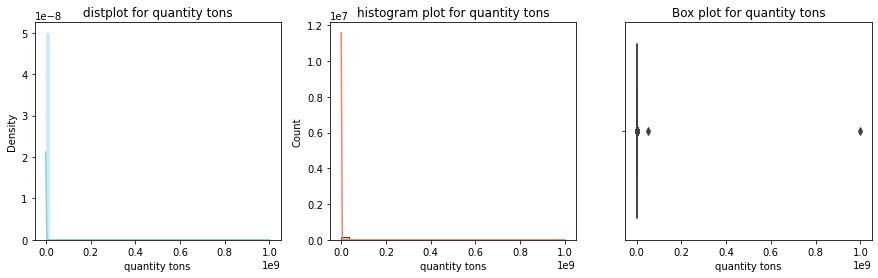

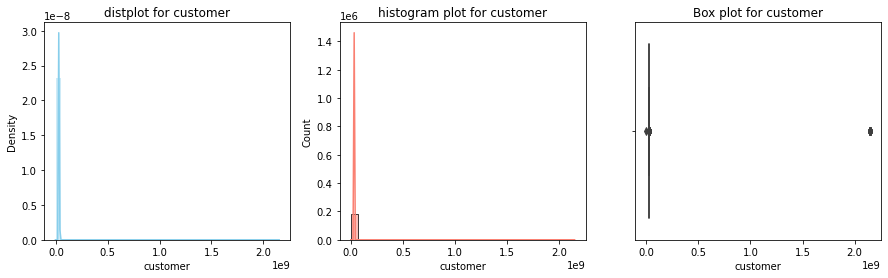

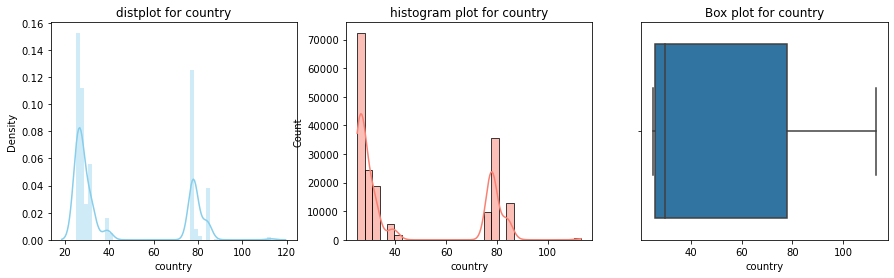

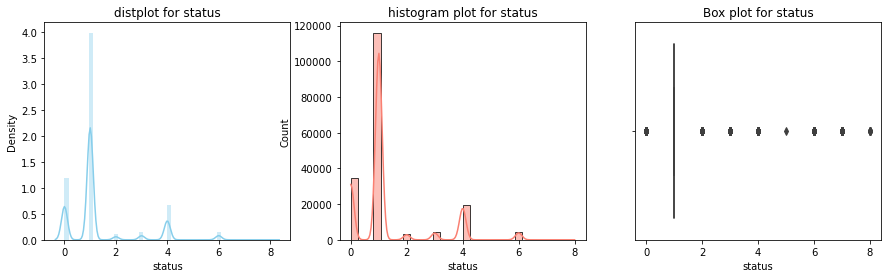

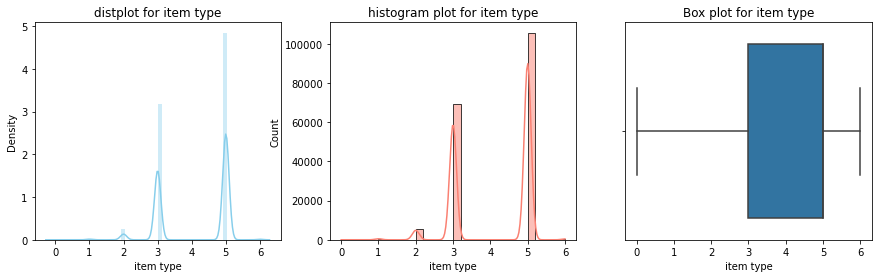

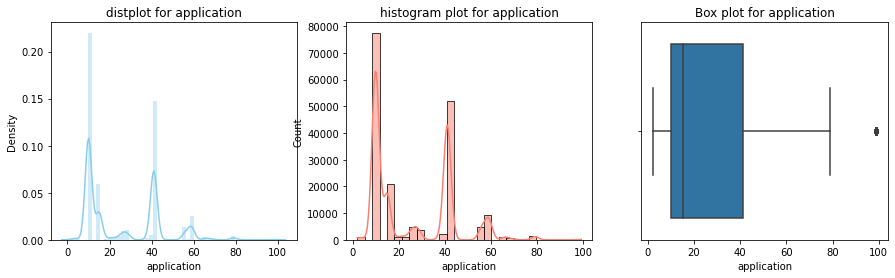

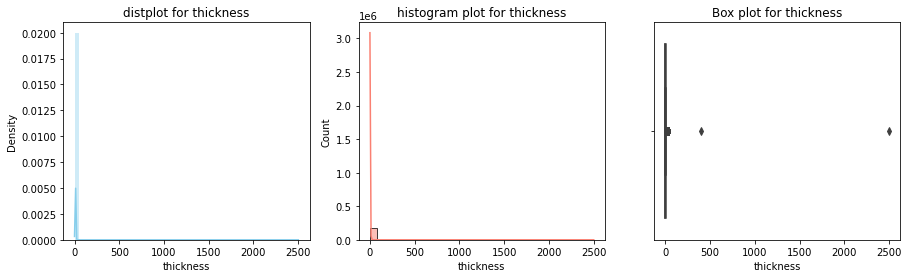

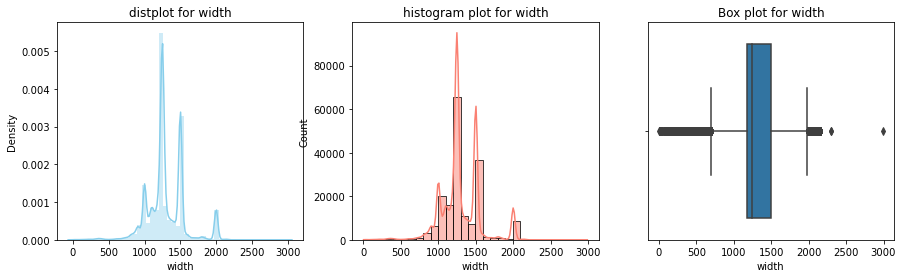

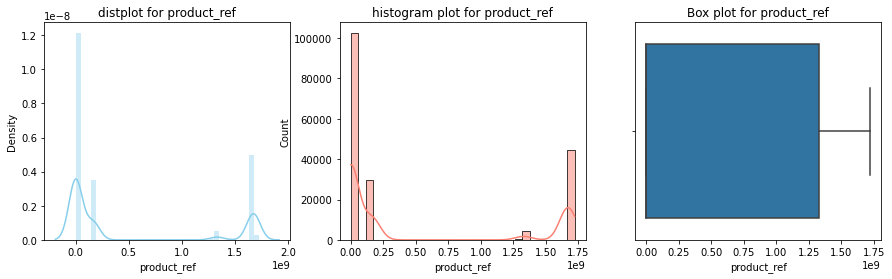

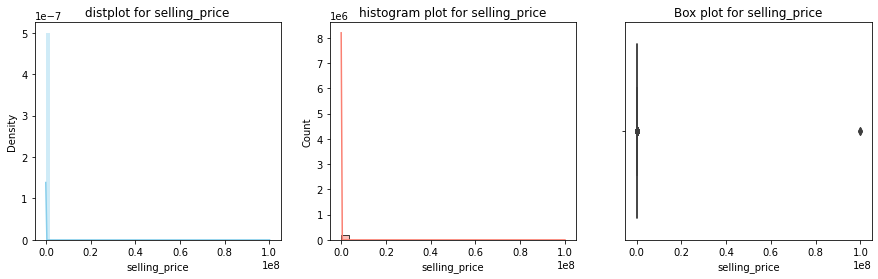

In [24]:
for i in skewed_columns:
    try:
        plot(df, i)
    except Exception as e:
        pass
#         print(f"Error plotting {i}: {e}")

In [25]:
#Skewed columns:
# 1.quantity tons
# 2.customer
# 3.thickness
# 4.selling_price

In [26]:
df1= df.copy()

In [27]:
df1.columns

Index(['item_date', 'quantity tons', 'customer', 'country', 'status',
       'item type', 'application', 'thickness', 'width', 'product_ref',
       'delivery date', 'selling_price', 'item_date_1', 'delivery_date_1'],
      dtype='object')

In [28]:
# creating a new column with handled skeweness in the data using np.LOG
df1["quantity_tons_log"]= np.log(df1["quantity tons"])
df1["customer_log"]= np.log(df1["customer"])
df1["thickness_log"]= np.log(df1["thickness"])
df1["selling_price_log"]= np.log(df1["selling_price"])

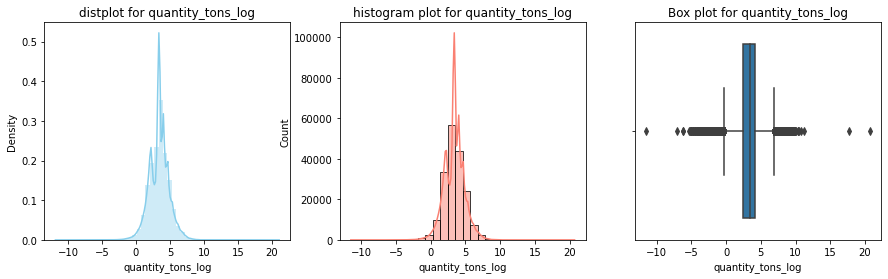

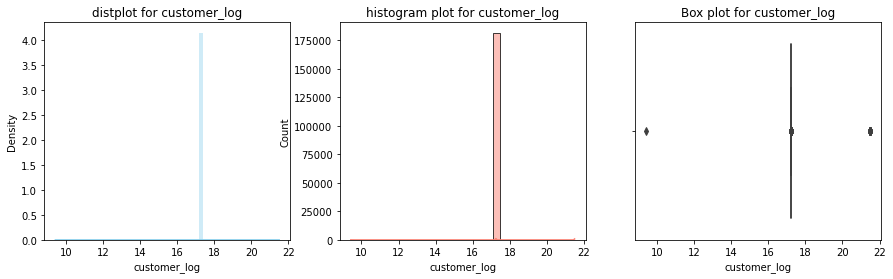

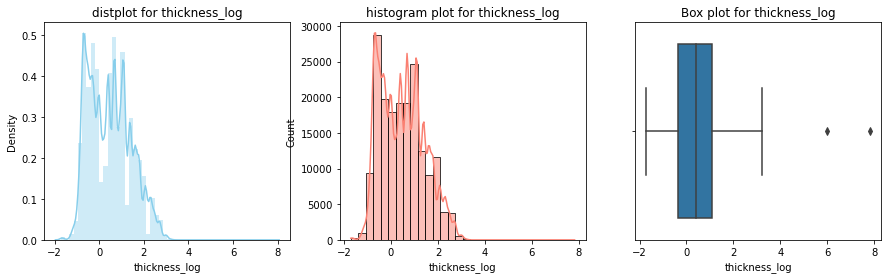

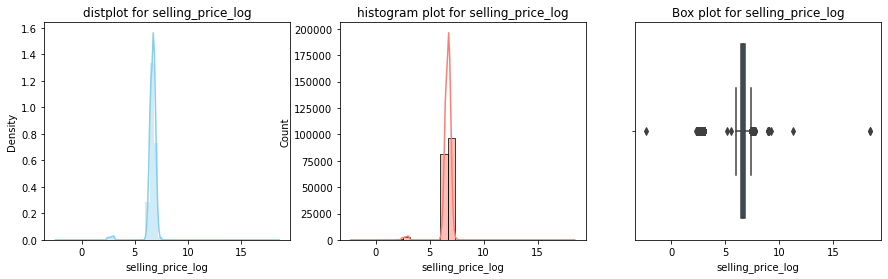

In [29]:
skwed_columns_2=["quantity_tons_log","customer_log","thickness_log","selling_price_log"]
for i in skwed_columns_2:
    try:
        plot(df1, i)
    except Exception as e:
        pass

In [30]:
# Outliers Handling - Interquartile Range(IQR) Method
df2= df1.copy()
df2.head()

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price,item_date_1,delivery_date_1,quantity_tons_log,customer_log,thickness_log,selling_price_log
0,20210401.0,54.151139,30156308.0,28.0,1,5.0,10.0,2.00,1500.0,1670798778,20210701.0,854.00,2021-04-01,2021-07-01,3.991779,17.221905,0.693147,6.749931
1,20210401.0,768.024839,30202938.0,25.0,1,5.0,41.0,0.80,1210.0,1668701718,20210401.0,1047.00,2021-04-01,2021-04-01,6.643822,17.223450,-0.223144,6.953684
2,20210401.0,386.127949,30153963.0,30.0,1,6.0,28.0,0.38,952.0,628377,20210101.0,644.33,2021-04-01,2021-01-01,5.956169,17.221827,-0.967584,6.468211
3,20210401.0,202.411065,30349574.0,32.0,1,3.0,59.0,2.30,1317.0,1668701718,20210101.0,768.00,2021-04-01,2021-01-01,5.310301,17.228293,0.832909,6.643790
4,20210401.0,785.526262,30211560.0,28.0,1,5.0,10.0,4.00,2000.0,640665,20210301.0,577.00,2021-04-01,2021-03-01,6.666354,17.223735,1.386294,6.357842


In [31]:
# function to handle outlier
# (Ex: lower threshold = 5 and upper threshold = 20)
# above upper threshold values (>20) are converted to upper threshold value (20) in features
# below lower threshold values (<5)  are converted to lower threshold value (5)  in features
def outlier(df,column):
    q1= df[column].quantile(0.25)
    q3= df[column].quantile(0.75)

    iqr= q3-q1

    upper_threshold= q3 + (1.5*iqr)
    lower_threshold= q1 - (1.5*iqr)

    df[column]= df[column].clip(lower_threshold, upper_threshold)

In [32]:
df2.columns

Index(['item_date', 'quantity tons', 'customer', 'country', 'status',
       'item type', 'application', 'thickness', 'width', 'product_ref',
       'delivery date', 'selling_price', 'item_date_1', 'delivery_date_1',
       'quantity_tons_log', 'customer_log', 'thickness_log',
       'selling_price_log'],
      dtype='object')

In [33]:
# outliers column identified using box plots are below
outlier_columns= ['quantity_tons_log', 'customer_log', 'thickness_log','selling_price_log','width','application']
for i in outlier_columns:
    outlier(df2,i)

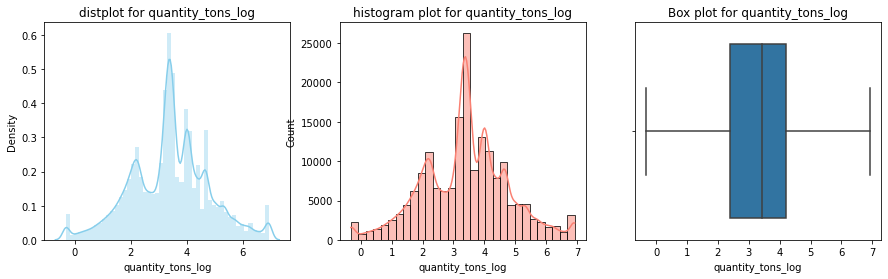

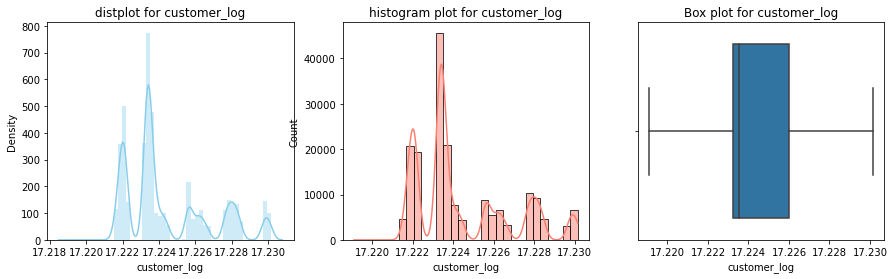

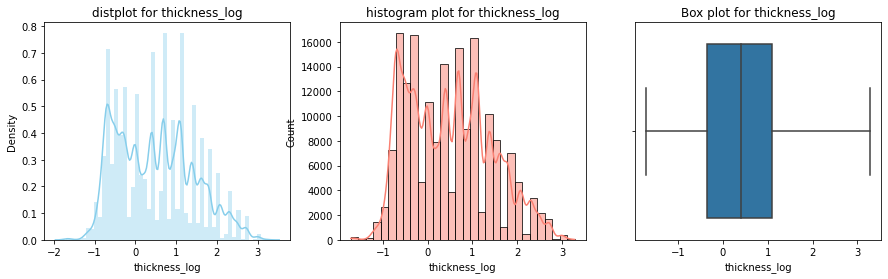

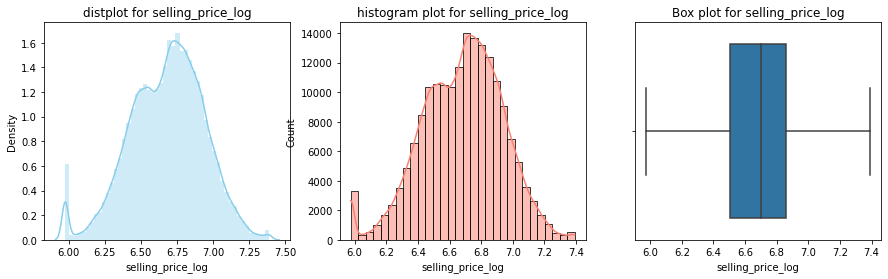

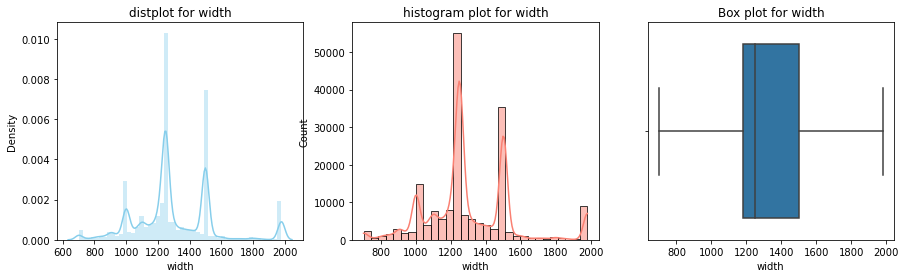

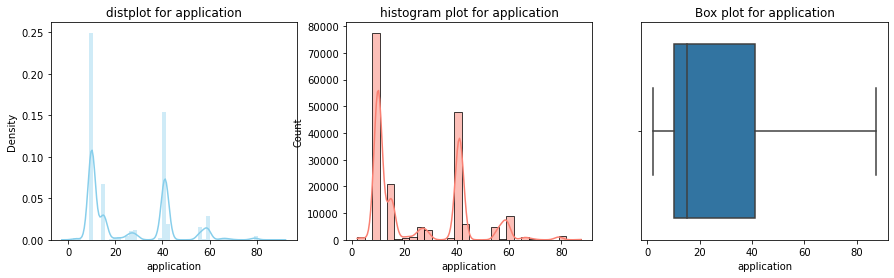

In [34]:
# after outlier corrected, ploting the columns to cross verify
for i in outlier_columns:
    plot(df2,i)

In [35]:
#Droping the unwanted skewed columns
#Skewed columns:
# 1.quantity tons
# 2.customer
# 3.thickness
# 4.selling_price

df3= df2.drop(columns=["quantity tons","customer","thickness","selling_price"])

In [36]:
df3.head()

,item_date,country,status,item type,application,width,product_ref,delivery date,item_date_1,delivery_date_1,quantity_tons_log,customer_log,thickness_log,selling_price_log
0,20210401.0,28.0,1,5.0,10.0,1500.0,1670798778,20210701.0,2021-04-01,2021-07-01,3.991779,17.221905,0.693147,6.749931
1,20210401.0,25.0,1,5.0,41.0,1210.0,1668701718,20210401.0,2021-04-01,2021-04-01,6.643822,17.223450,-0.223144,6.953684
2,20210401.0,30.0,1,6.0,28.0,952.0,628377,20210101.0,2021-04-01,2021-01-01,5.956169,17.221827,-0.967584,6.468211
3,20210401.0,32.0,1,3.0,59.0,1317.0,1668701718,20210101.0,2021-04-01,2021-01-01,5.310301,17.228293,0.832909,6.643790
4,20210401.0,28.0,1,5.0,10.0,1980.0,640665,20210301.0,2021-04-01,2021-03-01,6.666354,17.223735,1.386294,6.357842


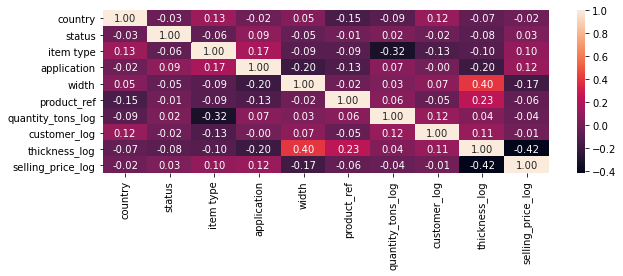

In [37]:
#Checking the correlation with using the heatmap

corr= df3.drop(columns=["item_date","delivery date","item_date_1","delivery_date_1"]).corr()
plt.figure(figsize=(10,3))
sns.heatmap(corr, annot= True, fmt="0.2f")
plt.show()

In [38]:
# Wrong delivery date handling using ML prediction
df4= df3.copy()
df4.head()

,item_date,country,status,item type,application,width,product_ref,delivery date,item_date_1,delivery_date_1,quantity_tons_log,customer_log,thickness_log,selling_price_log
0,20210401.0,28.0,1,5.0,10.0,1500.0,1670798778,20210701.0,2021-04-01,2021-07-01,3.991779,17.221905,0.693147,6.749931
1,20210401.0,25.0,1,5.0,41.0,1210.0,1668701718,20210401.0,2021-04-01,2021-04-01,6.643822,17.223450,-0.223144,6.953684
2,20210401.0,30.0,1,6.0,28.0,952.0,628377,20210101.0,2021-04-01,2021-01-01,5.956169,17.221827,-0.967584,6.468211
3,20210401.0,32.0,1,3.0,59.0,1317.0,1668701718,20210101.0,2021-04-01,2021-01-01,5.310301,17.228293,0.832909,6.643790
4,20210401.0,28.0,1,5.0,10.0,1980.0,640665,20210301.0,2021-04-01,2021-03-01,6.666354,17.223735,1.386294,6.357842


In [39]:
df4.dtypes

item_date            float64
country              float64
status                 int64
item type            float64
application          float64
width                float64
product_ref            int64
delivery date        float64
item_date_1           object
delivery_date_1       object
quantity_tons_log    float64
customer_log         float64
thickness_log        float64
selling_price_log    float64
dtype: object

In [40]:
#creating a new column to convert the datatype (object to datetime format)
df4["delivery_date_1"]= pd.to_datetime(df4["delivery_date_1"])
df4["item_date_1"]= pd.to_datetime(df4["item_date_1"])

In [41]:
#identifying the difference of the "delivery date" and the "item date"
df4["date_differ"]= (df4["delivery_date_1"]-df4["item_date_1"]).dt.days

In [42]:
df4["date_differ"]

0         91
1          0
2        -90
3        -90
4        -31
          ..
181668    -1
181669    -1
181670    -1
181671    -1
181672    -1
Name: date_differ, Length: 181673, dtype: int64

In [43]:
# some values have a negative values
# it's mean the "delivery date provides , the previous date then the "item date"
# so this is not possible , so we want to predic the delivery date for the some datas

#creating the another 3 columns using the "item_date_1"
# it is usefull for the delivery date prediction
df4["item_date_day"]= df4["item_date_1"].dt.day
df4["item_date_month"]= df4["item_date_1"].dt.month
df4["item_date_year"]= df4["item_date_1"].dt.year
df4.head()

,item_date,country,status,item type,application,width,product_ref,delivery date,item_date_1,delivery_date_1,quantity_tons_log,customer_log,thickness_log,selling_price_log,date_differ,item_date_day,item_date_month,item_date_year
0,20210401.0,28.0,1,5.0,10.0,1500.0,1670798778,20210701.0,2021-04-01,2021-07-01,3.991779,17.221905,0.693147,6.749931,91,1,4,2021
1,20210401.0,25.0,1,5.0,41.0,1210.0,1668701718,20210401.0,2021-04-01,2021-04-01,6.643822,17.223450,-0.223144,6.953684,0,1,4,2021
2,20210401.0,30.0,1,6.0,28.0,952.0,628377,20210101.0,2021-04-01,2021-01-01,5.956169,17.221827,-0.967584,6.468211,-90,1,4,2021
3,20210401.0,32.0,1,3.0,59.0,1317.0,1668701718,20210101.0,2021-04-01,2021-01-01,5.310301,17.228293,0.832909,6.643790,-90,1,4,2021
4,20210401.0,28.0,1,5.0,10.0,1980.0,640665,20210301.0,2021-04-01,2021-03-01,6.666354,17.223735,1.386294,6.357842,-31,1,4,2021


In [44]:
#separating the posive values(pv) dataframe and negative values(nv) dataframe based on the "date_differ" column
df4_pv= df4[df4["date_differ"]>=0]
df4_pv.reset_index(drop= True, inplace= True)
df4_pv.tail()

,item_date,country,status,item type,application,width,product_ref,delivery date,item_date_1,delivery_date_1,quantity_tons_log,customer_log,thickness_log,selling_price_log,date_differ,item_date_day,item_date_month,item_date_year
165560,20200702.0,25.0,0,3.0,15.0,1980.0,640665,20200801.0,2020-07-02,2020-08-01,3.472467,17.224270,1.791759,6.313548,30,2,7,2020
165561,20200702.0,30.0,0,3.0,10.0,1525.0,640665,20200801.0,2020-07-02,2020-08-01,4.196171,17.222079,1.348073,6.126869,30,2,7,2020
165562,20200702.0,30.0,0,3.0,10.0,1525.0,640665,20200801.0,2020-07-02,2020-08-01,4.156686,17.222079,1.766442,6.124683,30,2,7,2020
165563,20200702.0,30.0,0,3.0,10.0,1500.0,640665,20200801.0,2020-07-02,2020-08-01,4.025862,17.222079,2.060514,6.126869,30,2,7,2020
165564,20200702.0,30.0,0,3.0,10.0,1830.0,640665,20200801.0,2020-07-02,2020-08-01,5.328963,17.222079,1.348073,6.131226,30,2,7,2020


In [45]:
df4_nv= df4[df4["date_differ"]<0]
df4_nv.reset_index(drop= True, inplace= True)
df4_nv.tail()

,item_date,country,status,item type,application,width,product_ref,delivery date,item_date_1,delivery_date_1,quantity_tons_log,customer_log,thickness_log,selling_price_log,date_differ,item_date_day,item_date_month,item_date_year
16103,20200702.0,25.0,1,5.0,41.0,1220.0,164141591,20200701.0,2020-07-02,2020-07-01,4.629691,17.223381,-0.040822,6.381816,-1,2,7,2020
16104,20200702.0,25.0,1,5.0,41.0,1500.0,164141591,20200701.0,2020-07-02,2020-07-01,5.337954,17.223381,-0.051293,6.378426,-1,2,7,2020
16105,20200702.0,25.0,1,5.0,41.0,1250.0,164141591,20200701.0,2020-07-02,2020-07-01,1.443523,17.223381,-0.342490,6.428105,-1,2,7,2020
16106,20200702.0,25.0,1,5.0,41.0,1250.0,164141591,20200701.0,2020-07-02,2020-07-01,3.413291,17.223381,-0.162519,6.398595,-1,2,7,2020
16107,20200702.0,25.0,1,5.0,41.0,1240.0,164141591,20200701.0,2020-07-02,2020-07-01,6.008043,17.223381,-0.342490,6.408529,-1,2,7,2020


In [46]:
# !pip install xgboost

In [47]:
# now we want to create the model for delivery date prediction
# importing the model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

In [48]:
#Find the best algorithm for the "delivery date" prediction

def accuracy_date_prediction(df, algorithm):
    x= df.drop(columns=["item_date_1", "delivery_date_1", "date_differ"])
    y= df["date_differ"]

    #teain test splitting
    x_train, x_test, y_train, y_test= train_test_split(x,y, test_size= 0.2, random_state=42)

    model= algorithm().fit(x_train,y_train)
    y_pred= model.predict(x_test)

    #checking the accuracy score
    mse= mean_squared_error(y_test, y_pred)
    rmse= np.sqrt(mse)
    mae= mean_absolute_error(y_test,y_pred)
    r2= r2_score(y_test, y_pred)

    metrics={"R2_score":r2,
           "Mean_squared_error":mse,
           "Root_mean_squared_error":rmse,
           "Mean_absolute_error":mae,
           }
    return metrics

In [49]:
print(accuracy_date_prediction(df4_pv,DecisionTreeRegressor))
print(accuracy_date_prediction(df4_pv,RandomForestRegressor))
print(accuracy_date_prediction(df4_pv,ExtraTreesRegressor))
print(accuracy_date_prediction(df4_pv,GradientBoostingRegressor))
print(accuracy_date_prediction(df4_pv,AdaBoostRegressor))
print(accuracy_date_prediction(df4_pv,XGBRegressor))

{'R2_score': 0.9968666116449975, 'Mean_squared_error': 4.861413946184278, 'Root_mean_squared_error': 2.204861434690234, 'Mean_absolute_error': 0.015522604415184368}
{'R2_score': 0.9972099455070056, 'Mean_squared_error': 4.3287356325310276, 'Root_mean_squared_error': 2.080561374372558, 'Mean_absolute_error': 0.016492616193035974}
{'R2_score': 0.9992403435100117, 'Mean_squared_error': 1.1785978105275872, 'Root_mean_squared_error': 1.0856324472525622, 'Mean_absolute_error': 0.019010962461873008}
{'R2_score': 0.9879719616980714, 'Mean_squared_error': 18.66135522361305, 'Root_mean_squared_error': 4.319879075114609, 'Mean_absolute_error': 2.9476738510073535}
{'R2_score': 0.7376303375438351, 'Mean_squared_error': 407.0633421751666, 'Root_mean_squared_error': 20.175810818283527, 'Mean_absolute_error': 16.38772168224239}
{'R2_score': 0.9990133443840025, 'Mean_squared_error': 1.5307841953372214, 'Root_mean_squared_error': 1.2372486392545443, 'Mean_absolute_error': 0.2077463917833655}


In [50]:
# Random Forest algorithm is low bias and reduce overfitting compared to others.

In [51]:
# Model for the RandomForest

def RandomForest(train_df, test_df):

    x= train_df.drop(columns=["item_date_1", "delivery_date_1", "date_differ"]) #feature variable for training
    y= train_df["date_differ"] #target variable for training

    #train test splitting
    x_train, x_test, y_train, y_test= train_test_split(x,y, test_size= 0.2, random_state=42)
    model= RandomForestRegressor().fit(x_train, y_train)

    data= test_df.drop(columns=["item_date_1", "delivery_date_1", "date_differ"]) #feature variable for testing

    y_pred=model.predict(data) #predicted output

    return y_pred

In [52]:
date_difference= RandomForest(df4_pv,df4_nv)

In [53]:
date_difference

array([16.94, 16.95,  0.  , ..., 30.  , 30.  , 30.  ])

In [54]:
# changing the "date_differ" datatype float into int
date_difference_1= []
for i in date_difference:
    dd= int(round(i,0))
    date_difference_1.append(dd)

In [55]:
df4_nv["date_differ"]= pd.DataFrame(date_difference_1)

In [56]:
# checking the null values
df4_nv.isnull().sum()

item_date            0
country              0
status               0
item type            0
application          0
width                0
product_ref          0
delivery date        0
item_date_1          0
delivery_date_1      0
quantity_tons_log    0
customer_log         0
thickness_log        0
selling_price_log    0
date_differ          0
item_date_day        0
item_date_month      0
item_date_year       0
dtype: int64

In [57]:
#find the delivery date using "item_date_1" and "date_differ"

def find_delivery_date(item_date, date_differ):
    date= item_date + pd.to_timedelta(date_differ,unit= "D")
    return date

In [58]:
df4_nv["delivery_date_1"]= find_delivery_date(df4_nv["item_date_1"],df4_nv["date_differ"])

In [59]:
# Concadinating the two dataframes(df4_pv,df4_nv) based on the rows
df_final=pd.concat([df4_pv,df4_nv],axis=0,ignore_index=True)

In [60]:
df_final.tail()

,item_date,country,status,item type,application,width,product_ref,delivery date,item_date_1,delivery_date_1,quantity_tons_log,customer_log,thickness_log,selling_price_log,date_differ,item_date_day,item_date_month,item_date_year
181668,20200702.0,25.0,1,5.0,41.0,1220.0,164141591,20200701.0,2020-07-02,2020-08-01,4.629691,17.223381,-0.040822,6.381816,30,2,7,2020
181669,20200702.0,25.0,1,5.0,41.0,1500.0,164141591,20200701.0,2020-07-02,2020-08-01,5.337954,17.223381,-0.051293,6.378426,30,2,7,2020
181670,20200702.0,25.0,1,5.0,41.0,1250.0,164141591,20200701.0,2020-07-02,2020-08-01,1.443523,17.223381,-0.342490,6.428105,30,2,7,2020
181671,20200702.0,25.0,1,5.0,41.0,1250.0,164141591,20200701.0,2020-07-02,2020-08-01,3.413291,17.223381,-0.162519,6.398595,30,2,7,2020
181672,20200702.0,25.0,1,5.0,41.0,1240.0,164141591,20200701.0,2020-07-02,2020-08-01,6.008043,17.223381,-0.342490,6.408529,30,2,7,2020


In [61]:
# Now we create the three new columns using the "delivery_date_1"
df_final['delivery_date_day']= df_final["delivery_date_1"].dt.day
df_final['delivery_date_month']= df_final["delivery_date_1"].dt.month
df_final['delivery_date_year']= df_final["delivery_date_1"].dt.year

In [62]:
df_final.head(2)

,item_date,country,status,item type,application,width,product_ref,delivery date,item_date_1,delivery_date_1,...,customer_log,thickness_log,selling_price_log,date_differ,item_date_day,item_date_month,item_date_year,delivery_date_day,delivery_date_month,delivery_date_year
0,20210401.0,28.0,1,5.0,10.0,1500.0,1670798778,20210701.0,2021-04-01,2021-07-01,...,17.221905,0.693147,6.749931,91,1,4,2021,1,7,2021
1,20210401.0,25.0,1,5.0,41.0,1210.0,1668701718,20210401.0,2021-04-01,2021-04-01,...,17.223450,-0.223144,6.953684,0,1,4,2021,1,4,2021


In [63]:
df_final.columns

Index(['item_date', 'country', 'status', 'item type', 'application', 'width',
       'product_ref', 'delivery date', 'item_date_1', 'delivery_date_1',
       'quantity_tons_log', 'customer_log', 'thickness_log',
       'selling_price_log', 'date_differ', 'item_date_day', 'item_date_month',
       'item_date_year', 'delivery_date_day', 'delivery_date_month',
       'delivery_date_year'],
      dtype='object')

In [64]:
# Droping the unwanted columns
df_final.drop(columns=["item_date","delivery date","item_date_1","delivery_date_1","date_differ"],inplace=True)

In [65]:
df_final.columns

Index(['country', 'status', 'item type', 'application', 'width', 'product_ref',
       'quantity_tons_log', 'customer_log', 'thickness_log',
       'selling_price_log', 'item_date_day', 'item_date_month',
       'item_date_year', 'delivery_date_day', 'delivery_date_month',
       'delivery_date_year'],
      dtype='object')

In [66]:
# Saveing the dataframe
df_final.to_csv("Industrial_Copper_Colab.csv",index= False)

In [67]:
# Reading the saved "csv" file
df_final_class= pd.read_csv("Industrial_Copper_Colab.csv")

In [68]:
# This DataFrame don't have any null values and catagorical columns
# so our dataset is ready to the ML prediction

In [69]:
df_final = df_final_class.copy()

In [70]:
# !pip install --upgrade scikit-learn

In [71]:
# Classification Method - Predict (Won/Lose)
#packages
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,auc,roc_curve,confusion_matrix,classification_report

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from imblearn.combine import SMOTETomek

import pickle

In [72]:
# filter the status column only want to be a (won& loss)
df_c= df_final[(df_final["status"] == 1) | (df_final["status"] == 0)]
df_c.tail()

,country,status,item type,application,width,product_ref,quantity_tons_log,customer_log,thickness_log,selling_price_log,item_date_day,item_date_month,item_date_year,delivery_date_day,delivery_date_month,delivery_date_year
181668,25.0,1,5.0,41.0,1220.0,164141591,4.629691,17.223381,-0.040822,6.381816,2,7,2020,1,8,2020
181669,25.0,1,5.0,41.0,1500.0,164141591,5.337954,17.223381,-0.051293,6.378426,2,7,2020,1,8,2020
181670,25.0,1,5.0,41.0,1250.0,164141591,1.443523,17.223381,-0.342490,6.428105,2,7,2020,1,8,2020
181671,25.0,1,5.0,41.0,1250.0,164141591,3.413291,17.223381,-0.162519,6.398595,2,7,2020,1,8,2020
181672,25.0,1,5.0,41.0,1240.0,164141591,6.008043,17.223381,-0.342490,6.408529,2,7,2020,1,8,2020


In [73]:
# df_final["status"].value_counts()
df_c["status"].value_counts()

1    116012
0     34438
Name: status, dtype: int64

In [74]:
# This is a imbalanced data
# so we want to resampling the data by usin the "SMOTETomek"

In [75]:
df_c.columns

Index(['country', 'status', 'item type', 'application', 'width', 'product_ref',
       'quantity_tons_log', 'customer_log', 'thickness_log',
       'selling_price_log', 'item_date_day', 'item_date_month',
       'item_date_year', 'delivery_date_day', 'delivery_date_month',
       'delivery_date_year'],
      dtype='object')

In [76]:
x= df_c.drop(columns=["status"],axis=1)
y= df_c["status"]

In [77]:
x.shape,y.shape

((150450, 15), (150450,))

In [78]:
x_new,y_new= SMOTETomek().fit_resample(x,y)

In [79]:
x_new.shape,y_new.shape

((230118, 15), (230118,))

In [80]:
y_new.value_counts()

1    115059
0    115059
Name: status, dtype: int64

In [81]:
# now the data is balanced
# so, we continue the ML prediction

In [82]:
# find the best algorithm for the classification prediction

def accuracy_checking(x_data, y_data, algorithm):
    #train test splitting
    x_train, x_test, y_train, y_test= train_test_split(x_data, y_data, test_size= 0.2, random_state=42)

    model= algorithm().fit(x_train, y_train)

    y_pred_train= model.predict(x_train)
    y_pred_test= model.predict(x_test)

    #checking the accuracy_score
    accuracy_train= accuracy_score(y_train, y_pred_train)
    accuracy_test= accuracy_score(y_test, y_pred_test)

    metrics={"Algorithm": algorithm.__name__,
           "Accuracy_Train": accuracy_train,
           "Accuracy_Test": accuracy_test}
    return metrics

In [83]:
print(accuracy_checking(x,y,DecisionTreeClassifier))
print(accuracy_checking(x,y,RandomForestClassifier))
print(accuracy_checking(x,y,ExtraTreesClassifier))
print(accuracy_checking(x,y,AdaBoostClassifier))
print(accuracy_checking(x,y,GradientBoostingClassifier))
print(accuracy_checking(x,y,XGBClassifier))

{'Algorithm': 'DecisionTreeClassifier', 'Accuracy_Train': 1.0, 'Accuracy_Test': 0.9512130275839149}
{'Algorithm': 'RandomForestClassifier', 'Accuracy_Train': 1.0, 'Accuracy_Test': 0.9698570953805251}
{'Algorithm': 'ExtraTreesClassifier', 'Accuracy_Train': 1.0, 'Accuracy_Test': 0.9740445330674643}
{'Algorithm': 'AdaBoostClassifier', 'Accuracy_Train': 0.8161016949152542, 'Accuracy_Test': 0.8145563310069791}
{'Algorithm': 'GradientBoostingClassifier', 'Accuracy_Train': 0.8351944167497507, 'Accuracy_Test': 0.8334662678630774}
{'Algorithm': 'XGBClassifier', 'Accuracy_Train': 0.9475822532402791, 'Accuracy_Test': 0.9358258557660353}


In [84]:
print(accuracy_checking(x_new,y_new,DecisionTreeClassifier))
print(accuracy_checking(x_new,y_new,RandomForestClassifier))
print(accuracy_checking(x_new,y_new,ExtraTreesClassifier))
print(accuracy_checking(x_new,y_new,AdaBoostClassifier))
print(accuracy_checking(x_new,y_new,GradientBoostingClassifier))
print(accuracy_checking(x_new,y_new,XGBClassifier))

{'Algorithm': 'DecisionTreeClassifier', 'Accuracy_Train': 1.0, 'Accuracy_Test': 0.9623022770728316}
{'Algorithm': 'RandomForestClassifier', 'Accuracy_Train': 1.0, 'Accuracy_Test': 0.9809229966973753}
{'Algorithm': 'ExtraTreesClassifier', 'Accuracy_Train': 1.0, 'Accuracy_Test': 0.9845949939162176}
{'Algorithm': 'AdaBoostClassifier', 'Accuracy_Train': 0.7752669831716406, 'Accuracy_Test': 0.772618633756301}
{'Algorithm': 'GradientBoostingClassifier', 'Accuracy_Train': 0.8216780557758536, 'Accuracy_Test': 0.8174213453850165}
{'Algorithm': 'XGBClassifier', 'Accuracy_Train': 0.9543874325073061, 'Accuracy_Test': 0.9472449156961585}


In [85]:
# we got good accuracy after oversampling
# DecisionTreeClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier and RandomForestClassifier both have good testing accuracy, but in training accuracy is overfitting.
# so we want the reduce the overfitting.
# RandomForestClassifier is good interpretability, so i select the algorithm

In [86]:
# Get the high accuracy using Hyperparameter Tuning method with using of the GridsearchCV

x_train, x_test, y_train, y_test= train_test_split(x_new,y_new, test_size= 0.2, random_state=42)

parameters= {"max_depth": [2,5,10,20],
             "min_samples_split": [2,5,10],
             "min_samples_leaf": [1,2,4],
             "max_features": ['sqrt', 'log2', None]}

gridsearch= GridSearchCV(estimator= RandomForestClassifier(), param_grid= parameters, cv= 5, n_jobs= -1)
gridsearch.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 5, 10, 20],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [87]:
gridsearch.cv_results_

{'mean_fit_time': array([ 607.46934309,   13.00121603,   11.05397139,   10.91587877,
          12.13093939,   10.93737235,   11.27919097,   11.35498466,
          11.34280148,   10.90533724,   10.95630789,   10.97307034,
          11.07214622,   12.44407811, 2938.16058755,  988.19543118,
          12.46946917,   10.39860091,   35.32439456,   32.27290239,
          33.00285478,  123.73460364,   39.80857978,   37.23016567,
          36.54558973,   36.31965003,   36.08072743,   21.25423913,
          20.50883179,   20.31246133,   21.10593657,   20.59053664,
          23.21652536,   23.21641288,   23.91615386,   24.16124463,
          23.86031666,   21.61340909,   21.34515266,   32.66033697,
          29.31747742,   28.50613689,   24.45229788,   24.61169429,
          30.0208014 ,  127.73448567,  106.59761171,   87.16879654,
          79.03583083,   77.80859094,   78.39737568,   77.56332293,
          77.16522937,   78.78364902,   34.15067863,   34.17699337,
          34.02099752,   33.882

In [88]:
gridsearch.best_score_

0.9675817757127408

In [89]:
gridsearch.best_params_

{'max_depth': 20,
 'max_features': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [90]:
# Passing the best Hypertuning paramers in the ,
# RandomForest algorithm and check the accuracy for training and testing

In [91]:
x_train, x_test, y_train, y_test= train_test_split(x_new, y_new, test_size= 0.2, random_state= 42)

model= RandomForestClassifier(max_depth=20, max_features= None, min_samples_leaf=1, min_samples_split=2).fit(x_train,y_train)

y_pred_train= model.predict(x_train)
y_pred_test= model.predict(x_test)

#checking the accuracy_score for train and test

accuracy_train= accuracy_score(y_train, y_pred_train)
accuracy_test= accuracy_score(y_test, y_pred_test)

print("Accuracy score for Train and Test")
print("----------------------------------")
print("Accuracy_Train: ",accuracy_train)
print("Accuracy_Test: ",accuracy_test)
print("  ")
#confution matrics and the classification report for test

print("Confution_matrix for Test")
print("--------------------------")
print(confusion_matrix(y_true= y_test, y_pred= y_pred_test))
print(" ")
print("Classification_report for Test")
print("-------------------------------")
print(classification_report(y_true= y_test, y_pred= y_pred_test))

Accuracy score for Train and Test
----------------------------------
Accuracy_Train:  0.9866318293915065
Accuracy_Test:  0.9700373718060142
  
Confution_matrix for Test
--------------------------
[[22664   351]
 [ 1028 21981]]
 
Classification_report for Test
-------------------------------
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     23015
           1       0.98      0.96      0.97     23009

    accuracy                           0.97     46024
   macro avg       0.97      0.97      0.97     46024
weighted avg       0.97      0.97      0.97     46024



In [92]:
# now the training accuracy overfitting reduced. so now model will predict effectively for unseen data

In [93]:
# Receiver Operating Characteristic (ROC) Curve and Area Under the Curve (AUC)

FP,TP,threshold= roc_curve(y_true= y_test, y_score=y_pred_test)
print(threshold)
print(FP)
print(TP)
print(" ")
auc_curve= auc(x=FP,y=TP)
print("auc_curve:",auc_curve)

[inf  1.  0.]
[0.         0.01525092 1.        ]
[0.         0.95532183 1.        ]
 
auc_curve: 0.9700354536385734


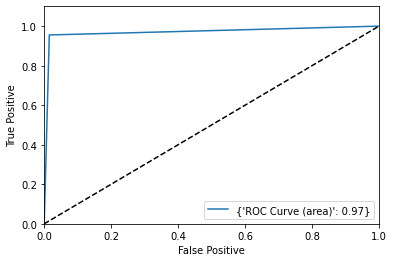

In [94]:
# create a plot for roc and auc curve
roc_point= {"ROC Curve (area)":round(auc_curve,2)}
plt.plot(FP,TP,label= roc_point)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.1])
plt.xlabel("False Positive")
plt.ylabel("True Positive")
plt.plot([0,1],[0,1],"k--")
plt.legend(loc= "lower right")
plt.show()

In [95]:
user_data = np.array([[30153963, 30, 6, 28, 952, 628377, 5.9, -0.96, 6.46, 1,4,2021,1,1,2021]])
y_pred_user= model.predict(user_data)
if y_pred_user == 1:
    print("Won")
else:
    print("Lose")

Won


In [96]:
#saving the model using the pickle

with open("Classification_model.pkl","wb") as f:
    pickle.dump(model,f)

In [97]:
with open("Classification_model.pkl","rb") as f1:
    class_model= pickle.load(f1)

In [98]:
user_data = np.array([[77.0,3.0,10.0,1500.0,164141591,3.677655,17.222226,0.000000,7.110696,1,4,2021,1,8,2021]])
y_pred_user= class_model.predict(user_data)

if y_pred_user == 1:
    print("Won")
else:
    print("Lose")

Lose


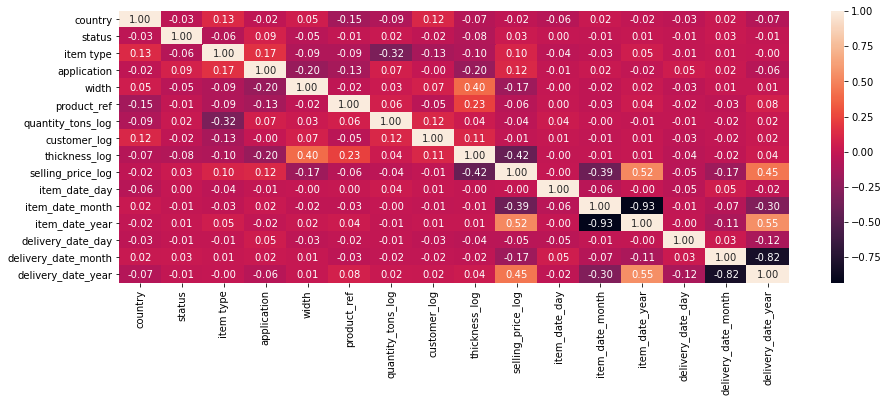

In [99]:
corr= df_final.corr()
plt.figure(figsize=(15,5))
sns.heatmap(corr,annot= True, fmt="0.2f")
plt.show()

In [100]:
# Regression Method - Predict the Selling Price
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from xgboost import XGBRegressor

In [101]:
df_regg= df_final_class.copy()

In [102]:
#Find the best ML model to predict the selling price

def accuracy_regressor(df,algorithm):

    x= df.drop(columns=["selling_price_log"], axis=1)
    y= df["selling_price_log"]

    #train test splitting
    x_train,x_test, y_train, y_test= train_test_split(x,y, test_size= 0.2, random_state=42)
    model= algorithm().fit(x_train, y_train)

    y_pred_train= model.predict(x_train)
    y_pred_test= model.predict(x_test)

    r2_train= r2_score(y_train, y_pred_train)
    r2_test= r2_score(y_test, y_pred_test)

    metrics={"Algorithm":algorithm.__name__,
           "R2_Train": r2_train,
           "R2_Test": r2_test}

    return metrics

In [103]:
print(accuracy_regressor(df_regg, DecisionTreeRegressor))
print(accuracy_regressor(df_regg, RandomForestRegressor))
print(accuracy_regressor(df_regg, ExtraTreesRegressor))
print(accuracy_regressor(df_regg, AdaBoostRegressor))
print(accuracy_regressor(df_regg, GradientBoostingRegressor))
print(accuracy_regressor(df_regg, XGBRegressor))

{'Algorithm': 'DecisionTreeRegressor', 'R2_Train': 0.9999206991163908, 'R2_Test': 0.9243923477809983}
{'Algorithm': 'RandomForestRegressor', 'R2_Train': 0.9940178579009258, 'R2_Test': 0.9571435183473638}
{'Algorithm': 'ExtraTreesRegressor', 'R2_Train': 0.9999206991163908, 'R2_Test': 0.9549385689002502}
{'Algorithm': 'AdaBoostRegressor', 'R2_Train': 0.6517618031787833, 'R2_Test': 0.6496958144447265}
{'Algorithm': 'GradientBoostingRegressor', 'R2_Train': 0.8857890164283868, 'R2_Test': 0.8863569911484744}
{'Algorithm': 'XGBRegressor', 'R2_Train': 0.9524584442706158, 'R2_Test': 0.9470956487877846}


In [104]:
# ExtraTreesClassifier and RandomForestClassifier both have good testing accuracy, but in training accuracy is overfitting.
# RandomForestClassifier is good interpretability, so i select the algorithm

In [105]:
x= df_regg.drop(columns=["selling_price_log"], axis=1)
y= df_regg["selling_price_log"]

x_train, x_test, y_train, y_test= train_test_split(x,y, test_size= 0.2, random_state= 42)

parameters_r= {"max_depth": [2,4,10,20],
               "min_samples_split": [2,5,10],
               "min_samples_leaf": [1,2,4],
               "max_features": ["sqrt","log2",None]}

gridsearch_r= GridSearchCV(estimator= RandomForestRegressor(), param_grid= parameters_r, cv= 5,n_jobs=-1)
gridsearch_r.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [2, 4, 10, 20],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [108]:
gridsearch_r.best_score_

0.9531782633466322

In [109]:
gridsearch_r.best_params_

{'max_depth': 20,
 'max_features': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [110]:
# pass the parameters and check the accuracy for both training and testing & overfitting

x = df_regg.drop(columns=['selling_price_log'], axis=1)
y = df_regg['selling_price_log']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

model_r = RandomForestRegressor(max_depth=20, max_features=None, min_samples_leaf=1, min_samples_split=2).fit(x_train, y_train)
y_pred_train = model_r.predict(x_train)
y_pred_test = model_r.predict(x_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)
r2_train, r2_test

(0.986629666506679, 0.9564628037128063)

In [111]:
#predict the selling price with hypertuning parameters and calculate the accuracy using metrics

x = df_regg.drop(columns=['selling_price_log'], axis=1)
y = df_regg['selling_price_log']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

model_r = RandomForestRegressor(max_depth=20, max_features=None, min_samples_leaf=1, min_samples_split=2).fit(x_train, y_train)
y_pred = model_r.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

metrics_r = {'R2': r2,
           'Mean Absolute Error': mae,
           'Mean Squared Error': mse,
           'Root Mean Squared Error': rmse}

metrics_r

{'R2': 0.956598747699746,
 'Mean Absolute Error': 0.03236499689536606,
 'Mean Squared Error': 0.0028576727277636357,
 'Root Mean Squared Error': 0.05345720463851094}

In [112]:
user_data = np.array([[30202938,25,1,5,41,1210,1668701718,6.6,-0.2,1,4,2021,1,4,2021]])
y_pred = model_r.predict(user_data)
print("Predicted selling price with Log: ",y_pred[0])
print("Predicted selling price without Log: ",np.exp(y_pred[0]))

Predicted selling price with Log:  7.1341681072510195
Predicted selling price without Log:  1254.0932835863805


In [113]:
import pickle

In [114]:
with open("Regression_Model.pkl","wb") as r:
    pickle.dump(model_r,r)

In [115]:
with open("Regression_Model.pkl","rb") as r1:
    regg_model=pickle.load(r1)

In [116]:
user_data = np.array([[28.0,1,5.0,10.0,1500.0,1670798778,3.991779,17.221905,0.693147,1,4,2021,1,7,2021]])
y_pred = regg_model.predict(user_data)
print("Predicted selling price with Log: ",y_pred[0])
print("Predicted selling price without Log: ",np.exp(y_pred[0]))

Predicted selling price with Log:  6.88332560947669
Predicted selling price without Log:  975.8663196658412
